# Notebook 3 - LifeLines

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy import stats
###NEW###
import lifelines

In [ ]:
from lifelines.datasets import load_psychiatric_patients
df = load_psychiatric_patients()
df.head()

,Age,T,C,sex
0,51,1,1,2
1,58,1,1,2
2,55,2,1,2
3,28,22,1,2
4,21,30,0,1


#### 1. Age
* Description: This feature represents the age of the psychiatric patients at the start of the study.
* Role: Age could be an important factor in survival analysis, as it might influence the likelihood of certain events occurring (e.g., relapse, recovery).
  
#### 2. T (Time):
* Description: This feature represents the time duration  until the event of interest occurs or until the patient is censored.
* Role: This is the primary time variable used in survival analysis. It measures how long each patient was observed before the event occurred or until the study ended.
#### 3. C (Censoring):
* Description: This feature indicates whether the event of interest was observed (C=1) or if the observation was censored (C=0).
* Role: Censoring occurs when a patient’s event time is not observed within the study period, either because the study ended, the patient left the study, or the event had not occurred by the end of the study. Censored data are crucial in survival analysis as they ensure that all available information is used.
#### 4. sex:
* Description: This feature represents the sex of the patients, with typically 1 for male and 2 for female.
* Role: Sex could be a covariate that impacts the survival time, potentially influencing the likelihood of different outcomes (e.g., differences in relapse rates between males and females).

In [ ]:
df.describe()

,Age,T,C,sex
count,26.000000,26.000000,26.000000,26.000000
mean,35.153846,26.423077,0.538462,1.576923
std,10.479284,11.559146,0.508391,0.503831
min,19.000000,1.000000,0.000000,1.000000
25%,28.250000,22.500000,0.000000,1.000000
50%,32.500000,30.500000,1.000000,2.000000
75%,42.500000,34.750000,1.000000,2.000000
max,58.000000,40.000000,1.000000,2.000000


All the values looks great there is nothing  suspicoues

In [ ]:
from lifelines.plotting import plot_lifetimes

In [ ]:
sub_df=df.sample(25)

<Axes: >

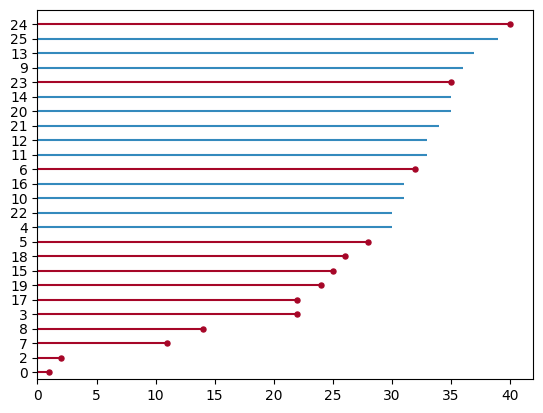

In [ ]:
plot_lifetimes(sub_df["T"],sub_df["C"])

In [ ]:
## The plot shows the lifetimes of subjects, with the time until the event on the horizontal axis.

<Axes: xlabel='sex', ylabel='T'>

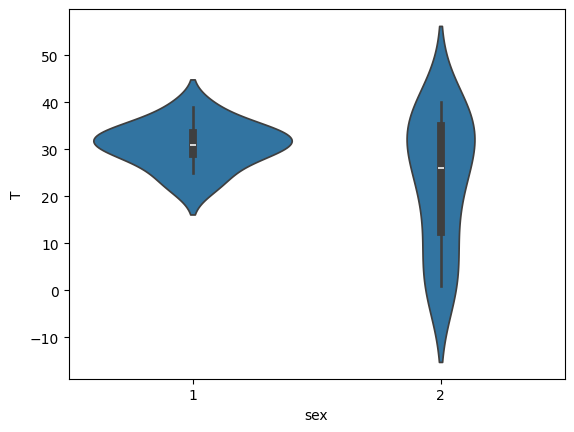

In [ ]:
sns.violinplot(x = 'sex', y = 'T', data = df)

Interpretation:
* The shape of the violin plots indicates the distribution of the time T for each sex category.
* The plot suggests that females (2) tend to have slightly longer observation times or time until the event than males (1). This is indicated by the longer tail of the violin plot for sex 2.
* The width of the violins shows the density of patients at different times. Both distributions have a peak around a similar time frame, indicating that most events occur within this period for both sexes.

<Axes: xlabel='C', ylabel='T'>

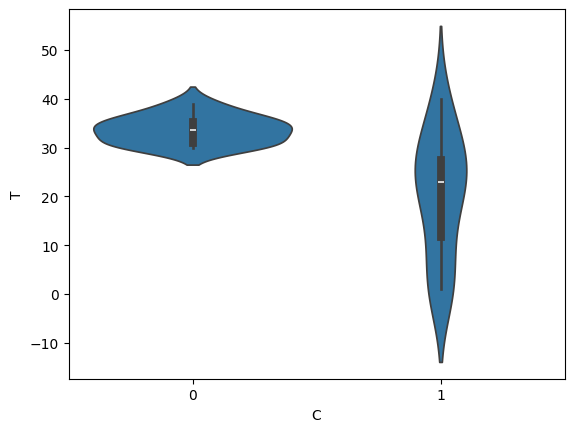

In [ ]:
sns.violinplot(x = 'C', y = 'T', data = df)

Interpretation:
* The violin plot for C=0 (censored data) shows a wider distribution, indicating that those who did not experience the event were observed over a longer period.
* The plot for C=1 (event occurred) is more concentrated in a shorter time frame, meaning that the event typically happened sooner rather than later.
* This distribution suggests that the event (possibly death) occurred within a shorter time frame for most patients, while those who were censored had a more extended observation period without the event occurring.

<Axes: xlabel='sex', ylabel='C'>

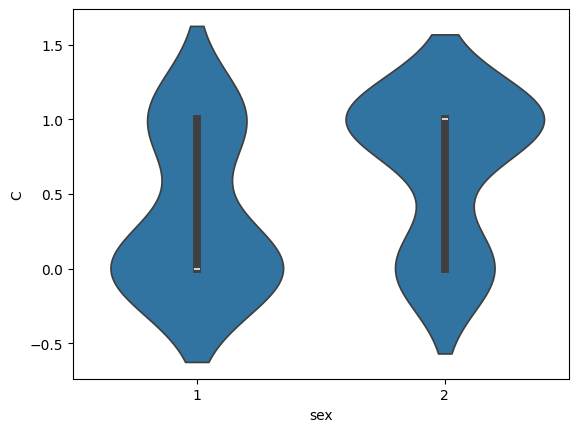

In [ ]:
sns.violinplot(x = 'sex', y = 'C', data = df)

Interpretation:
* The violin plots indicate the distribution of censoring (C) for each sex category.
* Both distributions have similar shapes, with some differences in width, suggesting that the likelihood of experiencing the event versus being censored is relatively similar across sexes.
* The slightly wider distribution for sex 2 (female) suggests that there might be more variability in the event occurrence or censoring among females compared to males.

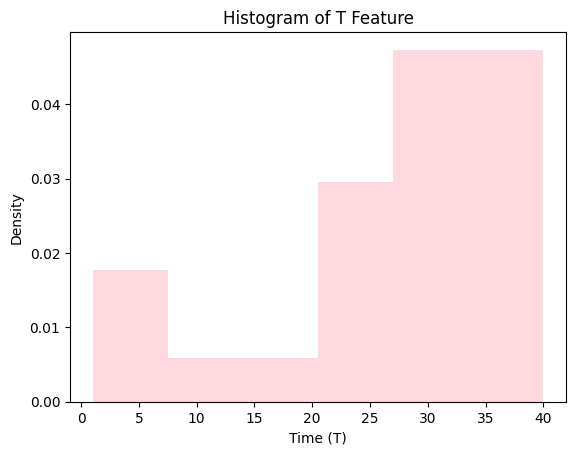

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from lifelines.datasets import load_psychiatric_patients

# Load the dataset
df = load_psychiatric_patients()

# Extract the 'T' feature
T_values = df['T']

# Plot a histogram of the 'T' values with density=True to normalize it
plt.hist(T_values, density=True, bins='auto', histtype='stepfilled', alpha=0.6, color='pink')

# Add labels and a title to the plot
plt.xlabel('Time (T)')
plt.ylabel('Density')
plt.title('Histogram of T Feature')

# Show the plot
plt.show()

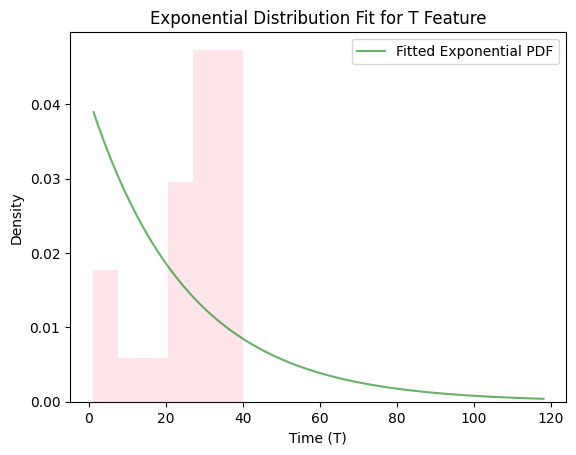

In [ ]:
from scipy.stats import expon

# Fit an Exponential distribution to the 'T' feature
params_expon = expon.fit(T_values)
RV_expon = expon(*params_expon)

# Generate values for the x-axis
x_expon = np.linspace(RV_expon.ppf(0.01), RV_expon.ppf(0.99), 100)

# Plot the PDF of the fitted Exponential distribution
plt.plot(x_expon, RV_expon.pdf(x_expon), 'g-', alpha=0.6, label='Fitted Exponential PDF')

# Plot the histogram of the 'T' values
plt.hist(T_values, density=True, bins='auto', histtype='stepfilled', alpha=0.4, color='pink')

# Add labels and a legend to the plot
plt.xlabel('Time (T)')
plt.ylabel('Density')
plt.title('Exponential Distribution Fit for T Feature')
plt.legend()

# Show the plot
plt.show()

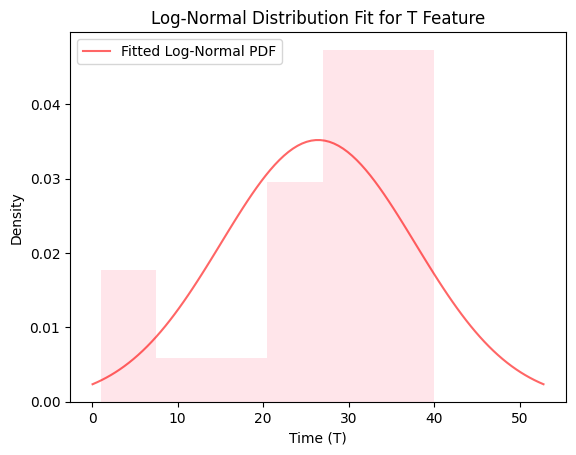

In [ ]:
from scipy.stats import lognorm

# Fit a Log-Normal distribution to the 'T' feature
params_lognorm = lognorm.fit(T_values)
RV_lognorm = lognorm(*params_lognorm)

# Generate values for the x-axis
x_lognorm = np.linspace(RV_lognorm.ppf(0.01), RV_lognorm.ppf(0.99), 100)

# Plot the PDF of the fitted Log-Normal distribution
plt.plot(x_lognorm, RV_lognorm.pdf(x_lognorm), 'r-', alpha=0.6, label='Fitted Log-Normal PDF')

# Plot the histogram of the 'T' values
plt.hist(T_values, density=True, bins='auto', histtype='stepfilled', alpha=0.4, color='pink')

# Add labels and a legend to the plot
plt.xlabel('Time (T)')
plt.ylabel('Density')
plt.title('Log-Normal Distribution Fit for T Feature')
plt.legend()

# Show the plot
plt.show()

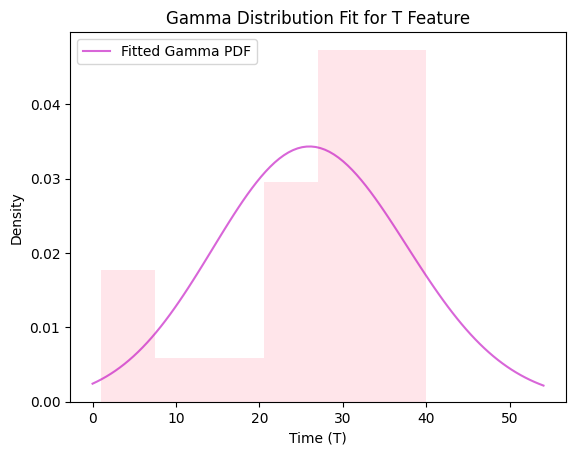

In [ ]:
from scipy.stats import gamma

# Fit a Gamma distribution to the 'T' feature
params_gamma = gamma.fit(T_values)
RV_gamma = gamma(*params_gamma)

# Generate values for the x-axis
x_gamma = np.linspace(RV_gamma.ppf(0.01), RV_gamma.ppf(0.99), 100)

# Plot the PDF of the fitted Gamma distribution
plt.plot(x_gamma, RV_gamma.pdf(x_gamma), 'm-', alpha=0.6, label='Fitted Gamma PDF')

# Plot the histogram of the 'T' values
plt.hist(T_values, density=True, bins='auto', histtype='stepfilled', alpha=0.4, color='pink')

# Add labels and a legend to the plot
plt.xlabel('Time (T)')
plt.ylabel('Density')
plt.title('Gamma Distribution Fit for T Feature')
plt.legend()

# Show the plot
plt.show()

Non-Parametric approach, using CDF function

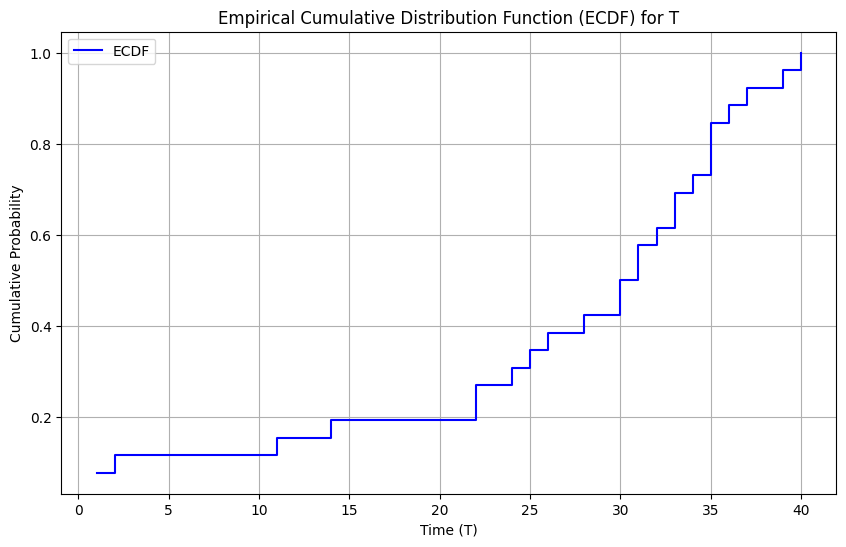

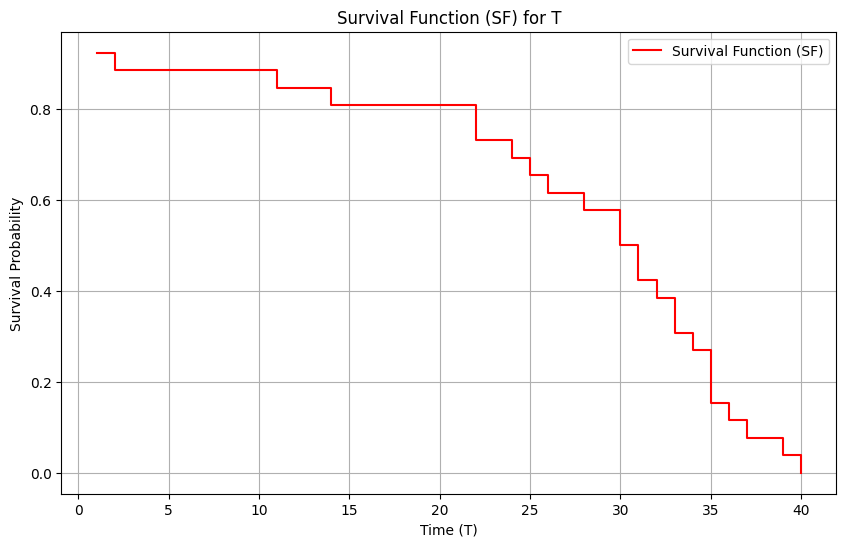

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

# Extract the 'T' feature
T_values = df['T']

# Compute the empirical cumulative distribution function (ECDF)
ecdf = ECDF(T_values)

# Generate x values for plotting
x_values = np.sort(T_values)
y_values = ecdf(x_values)

# Plot the ECDF
plt.figure(figsize=(10, 6))
plt.step(x_values, y_values, where='post', label='ECDF', color='blue')
plt.xlabel('Time (T)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function (ECDF) for T')
plt.grid(True)
plt.legend()
plt.show()

# Compute and plot the survival function (SF) as 1 - ECDF
plt.figure(figsize=(10, 6))
plt.step(x_values, 1 - y_values, where='post', label='Survival Function (SF)', color='red')
plt.xlabel('Time (T)')
plt.ylabel('Survival Probability')
plt.title('Survival Function (SF) for T')
plt.grid(True)
plt.legend()
plt.show()

* ECDF: Displays the proportion of events that have occurred by a given time.
* Survival Function: Shows the probability that an individual survives past a given time. Both plots are complementary, and together they provide insight into the timing and occurrence of events in the dataset.

* Event Occurrence:
    - The majority of events seem to cluster between T=25 and T=35, as indicated by both the steep rise in the ECDF and the corresponding sharp decline in the survival function.
* Data Completion:
   - By T=40, the event has occurred for all individuals, as shown by the ECDF reaching 1.0 and the survival function reaching 0.

          KM_estimate
timeline             
0.0          1.000000
1.0          0.923077
2.0          0.884615
11.0         0.846154
14.0         0.807692


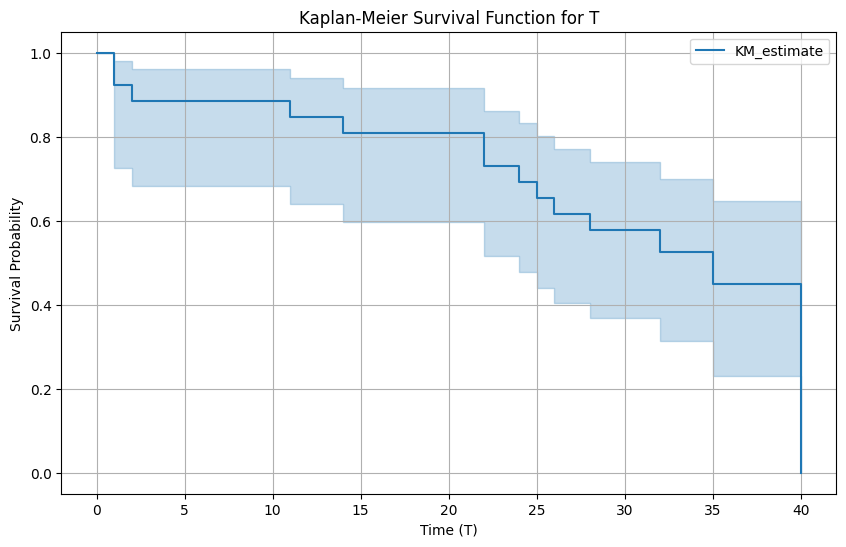

In [ ]:
# Import necessary libraries
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines.datasets import load_psychiatric_patients

# Load your dataset
df = load_psychiatric_patients()

# Instantiate the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the model to your data
kmf.fit(durations=df['T'], event_observed=df['C'])

# Print the survival function at the first few time points
print(kmf.survival_function_.head())

# Plot the Kaplan-Meier survival estimate
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Function for T')
plt.xlabel('Time (T)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

# If your dataset has multiple groups and you want to compare them:
# Assuming you have a 'group' column in your dataset
if 'group' in df.columns:
    groups = df['group']
    unique_groups = groups.unique()

    plt.figure(figsize=(10, 6))

    for group in unique_groups:
        kmf_group = KaplanMeierFitter()
        mask = (groups == group)
        kmf_group.fit(durations=df['T'][mask], event_observed=df['C'][mask], label=str(group))
        kmf_group.plot_survival_function()

    plt.title('Kaplan-Meier Survival Function by Group')
    plt.xlabel('Time (T)')
    plt.ylabel('Survival Probability')
    plt.grid(True)
    plt.legend()
    plt.show()

# Performing a T-test between groups (without accounting for censoring)
if 'group' in df.columns:
    group_1 = df[df['group'] == unique_groups[0]]['T']
    group_2 = df[df['group'] == unique_groups[1]]['T']

    from scipy.stats import ttest_ind
    t_stat, p_value = ttest_ind(group_1, group_2)
    print(f"T-test between groups: T-statistic = {t_stat}, p-value = {p_value}")

In our Kaplan-Meier survival plot
1. Survival Probability Over Time:
    * The y-axis represents the survival probability, which is the probability that an individual has survived up to a certain time point.
    * The x-axis represents the time (T), which might correspond to the time until an event (such as death, relapse, or failure) occurs.
2.	Survival Curve:
    * The blue line is the Kaplan-Meier estimate of the survival function. It steps down at each time point where an event occurs (e.g., a patient experiences the event being studied).
    * The curve starts at 1 (indicating 100% survival at time T = 0) and decreases as time progresses, reflecting the proportion of individuals

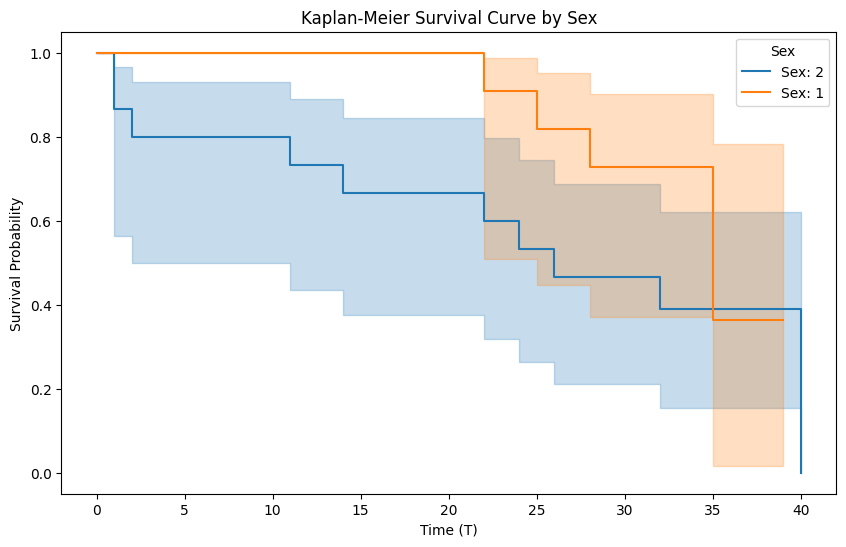

T-test result: TtestResult(statistic=-1.7648354915990165, pvalue=0.09031549010651213, df=24.0)


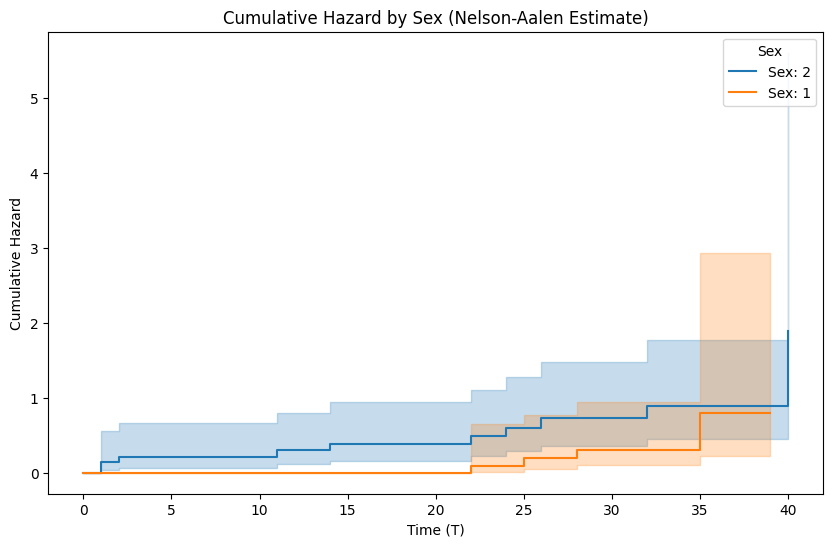

In [ ]:
# Import necessary libraries
from lifelines import KaplanMeierFitter, NelsonAalenFitter
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Initialize the Nelson-Aalen fitter
naf = NelsonAalenFitter()

# Separate data based on sex
sex_values = df['sex'].unique()

# Kaplan-Meier Plot for Multiple Groups (Sex)
plt.figure(figsize=(10, 6))
for sex in sex_values:
    kmf_sex = KaplanMeierFitter()
    ix = (df['sex'] == sex)
    kmf_sex.fit(df['T'][ix], event_observed=df['C'][ix], label=f'Sex: {sex}')
    kmf_sex.plot_survival_function()

plt.title('Kaplan-Meier Survival Curve by Sex')
plt.xlabel('Time (T)')
plt.ylabel('Survival Probability')
plt.legend(title="Sex")
plt.show()

# Perform a t-test to compare the means of the two sexes
if len(sex_values) == 2:
    sex_lifetimes = [df[df['sex'] == sex]['T'] for sex in sex_values]
    t_test_result = ttest_ind(sex_lifetimes[0], sex_lifetimes[1])
    print(f"T-test result: {t_test_result}")

# Nelson-Aalen Plot for Cumulative Hazard by Sex
plt.figure(figsize=(10, 6))
for sex in sex_values:
    naf_sex = NelsonAalenFitter()
    ix = (df['sex'] == sex)
    naf_sex.fit(df['T'][ix], event_observed=df['C'][ix], label=f'Sex: {sex}')
    naf_sex.plot_cumulative_hazard()

plt.title('Cumulative Hazard by Sex (Nelson-Aalen Estimate)')
plt.xlabel('Time (T)')
plt.ylabel('Cumulative Hazard')
plt.legend(title="Sex")
plt.show()

Survival Probability: The orange group (Sex = 2) tends to have lower survival probabilities earlier on compared to the blue group (Sex = 1).
* Hazard Rates: The orange group also shows a higher cumulative hazard, meaning they tend to experience events (e.g., death) more frequently as time progresses.
* T-test Result: The t-test result indicates no statistically significant difference between the two groups’ survival times, but there is a near-significant trend (p-value = 0.089), meaning there could be a difference that the data doesn’t have enough power to detect confidently.
* In summary, while there seems to be a trend where one group (Sex = 2) fares worse in terms of survival, the statistical analysis doesn’t provide strong evidence to conclude a significant difference between the groups. However, further investigation with more data or a different model might yield different results.

In [ ]:
from lifelines import CoxPHFitter

<lifelines.CoxPHFitter: fitted with 26 total observations, 12 right-censored observations>
             duration col = 'T'
                event col = 'C'
      baseline estimation = breslow
   number of observations = 26
number of events observed = 14
   partial log-likelihood = -36.88
         time fit was run = 2024-09-04 15:09:04 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
sex        0.75      2.12      0.61           -0.44            1.94                0.65                6.94

           cmp to    z    p  -log2(p)
covariate                            
sex          0.00 1.24 0.21      2.22
---
Concordance = 0.63
Partial AIC = 75.76
log-likelihood ratio test = 1.66 on 1 df
-log2(p) of ll-ratio test = 2.34

<Axes: xlabel='log(HR) (95% CI)'>

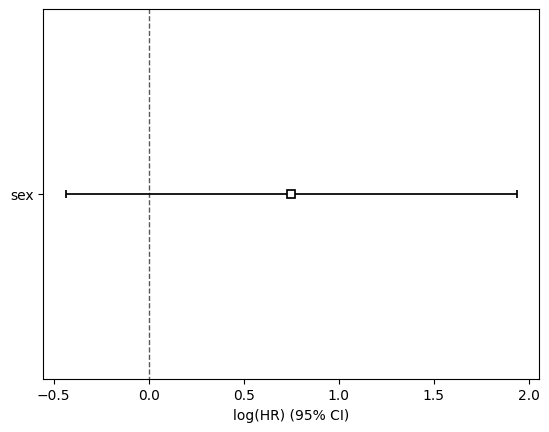

In [ ]:
# Instantiate the Cox proportional hazards model
cph = CoxPHFitter()

# Fit the Cox model to your data with gender as a covariate
cph.fit(df, duration_col='T', event_col='C', formula="sex")

# Print the summary of the Cox model to see the results
cph.print_summary()

# Plot the log hazard ratios (log(HR) with 95% confidence intervals)
cph.plot()

### Insights:

1. Hazard Ratio: The sex variable has a hazard ratio of 2.12, suggesting that one sex group has more than double the risk of the event occurring compared to the other group. However, the wide confidence interval (0.61 to 6.94) indicates uncertainty in this estimate.
2. Statistical Significance: The p-value for sex is 0.21, which is above the typical significance threshold of 0.05, indicating that the effect of sex on survival is not statistically significant.
3. Concordance Index: The C-index of 0.63 reflects moderate predictive accuracy of the model.
4. Model Fit: The AIC value of 75.76 and the log-likelihood ratio test suggest that including the sex variable does not significantly improve the model.


<Axes: >

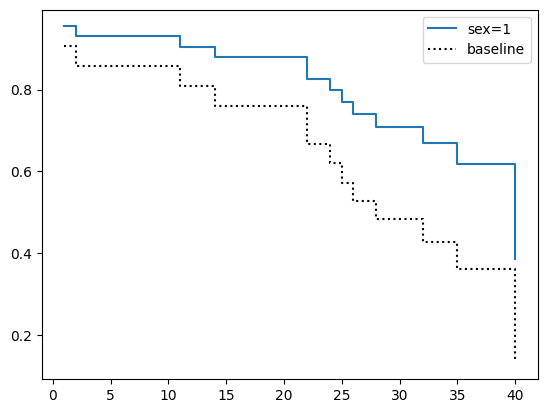

In [ ]:
cph.plot_partial_effects_on_outcome(covariates="sex", values=[1])

The plot visually demonstrates how the survival outcomes differ between the baseline group(sex=2) and the group where sex = 1.


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


[[<Axes: xlabel='rank-transformed time\n(p=0.0731)'>,
  <Axes: xlabel='km-transformed time\n(p=0.2187)'>]]

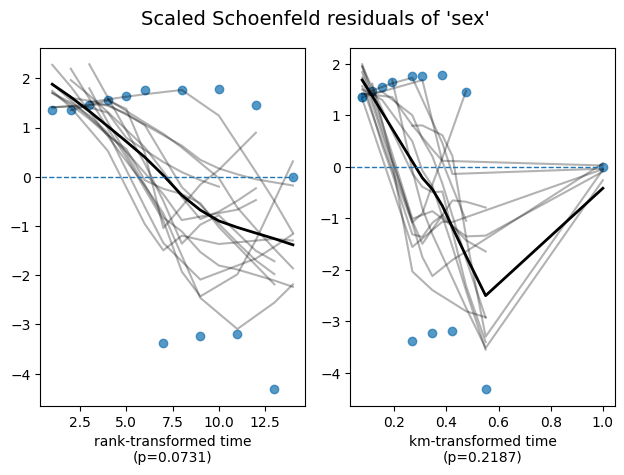

In [ ]:
cph.check_assumptions(df,show_plots=True)

1. Proportional Hazards Assumption: The plot is testing whether the proportional hazards assumption holds for the “sex” variable. The proportional hazards assumption implies that the effect of “sex” on the hazard ratio is constant over time. If the Schoenfeld residuals (the dots) randomly fluctuate around 0 with no clear trend, it suggests the proportional hazards assumption holds.
2. Lowess Line (Black Curve): The black lines represent the LOWESS (Locally Weighted Scatterplot Smoothing) curves that fit the residuals. A clear trend in these lines would suggest that the effect of “sex” on the hazard ratio changes over time, which would violate the proportional hazards assumption. In this case, the lines seem to stay relatively flat with no strong deviation, indicating that the proportional hazards assumption is likely satisfied.
3. P-values: Below each plot, there is a p-value:
* The first plot (rank-transformed time) shows a p-value of 0.0731, which is marginally above the common significance level of 0.05. This suggests that there is no strong evidence to reject the proportional hazards assumption for this covariate.
* The second plot (km-transformed time) shows a p-value of 0.2187, which further supports that the proportional hazards assumption holds for this covariate.
4. Visual Residual Pattern: The dots should ideally not display a clear trend away from 0 over time. The residuals are generally scattered with no apparent systematic deviation, which visually supports that “sex” satisfies the proportional hazards assumption.